<a href="https://colab.research.google.com/github/Laura-VFA/DataMining-21-22/blob/main/DM_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Iago García Suárez  
- David González Bermúdez  
- Sergio Martínez Cid  
- Laura Villa Fernández-Arroyo

# Minería de Datos
# Preproceso, Transformación e Hipótesis

## 1. Carga de datos e importación de librerías

Primero, se cargarán en distintos dataframes todos los datasets necesarios para la resolución del problema.  
Se utilizarán los datasets de:  
- Datos de consumo alimentario por CCAA
- Precios de la Junta de Andalucía
- Datos de MercaMadrid
- Datos de MarcaBarna
- Calendario de siembra
- Datos de precipitaciones y temperaturas de AEMet
- Necesidades de Riego y temperaturas de cultivos

In [820]:
import json
import math 
import pandas as pd
import numpy as np
from unidecode import unidecode
from numpy.core.arrayprint import ComplexFloatingFormat
from sklearn.preprocessing import KBinsDiscretizer

In [821]:
!rm *.*

!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/Dataset1.-%20DatosConsumoAlimentarioMAPAporCCAA.txt 
!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/Dataset2.-%20Precios%20Semanales%20Observatorio%20de%20Precios%20Junta%20de%20Andalucia.txt 
!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/Dataset3a_Datos_MercaMadrid.txt 
!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/Dataset3b_Datos_MercaBarna.txt
!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/planificacion_siembra.csv
!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/Aemet.csv
!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/RiegosYTemperaturasCultivos.txt

!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Dicts/ccaa_names.json
!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Dicts/cultivos_names.json
!wget https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Dicts/months_season.json


!pip install unidecode


--2021-12-17 11:52:39--  https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/Dataset1.-%20DatosConsumoAlimentarioMAPAporCCAA.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1885064 (1.8M) [text/plain]
Saving to: ‘Dataset1.- DatosConsumoAlimentarioMAPAporCCAA.txt’

Dataset1.- DatosCon 100%[===================>]   1.80M  --.-KB/s    in 0.04s   

2021-12-17 11:52:39 (49.7 MB/s) - ‘Dataset1.- DatosConsumoAlimentarioMAPAporCCAA.txt’ saved [1885064/1885064]

--2021-12-17 11:52:39--  https://raw.githubusercontent.com/Laura-VFA/DataMining-21-22/main/Datasets/Dataset2.-%20Precios%20Semanales%20Observatorio%20de%20Precios%20Junta%20de%20Andalucia.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.

In [822]:
calendario_siembra = pd.read_csv('planificacion_siembra.csv', sep=';')
calendario_siembra.head()


,Cultivo,Familia,Aprovecha,Epoca siemb,Asociac,Rotaciones,D siem-recol,ene,ene.1,feb,feb.1,mar,mar.1,abr,abr.1,may,may.1,jun,jun.1,jul,jul.1,ago,ago.1,sep,sep.1,oct,oct.1,nov,nov.1,dic,dic.1
0,ACELGA,Quenopodiáceas,hoja,Otoño-Primav,"judias, zanahorias, nabos y rabanos",2 años,90,C,SC,SC,SC,STC,STC,STC,STC,STC,STC,STC,STC,STC,STC,C,C,C,C,C,C,C,C,C,C
1,AJO,Liliáceas,bulbo,Otoño-Invierno,"fresas, remolacha, patata, lechuga, tomate, hi...",2 años,60-120,S,S,S,S,NaN,NaN,C,C,C,C,C,C,C,C,C,NaN,NaN,NaN,S,S,S,S,NaN,NaN
2,ALCACHOFA,Compuestas,infloresc,Primav,"lechuga, col, cebolla, haba, guisante",5 años,90-120,C,C,C,C,C,C,NaN,NaN,NaN,NaN,NaN,NaN,T,T,T,T,T,T,NaN,NaN,C,C,C,C
3,APIO,Umbrelíferas,hoja,Primav,"ajo, cebolla, puerro, maiz, guisante, judia, l...",no hoja,100,C,C,SC,SC,SC,SC,ST,ST,ST,ST,ST,T,T,T,NaN,NaN,NaN,C,C,C,C,C,C,C
4,BERENJENA,Solenáceas,fruto,Primav,"judias, patatas, pimiento, calendula, cañamo",3 años,130,NaN,NaN,NaN,S,S,ST,ST,ST,ST,ST,T,T,TC,C,C,C,C,C,C,C,NaN,NaN,NaN,NaN


In [823]:
consumo_CCAA = pd.read_csv('Dataset1.- DatosConsumoAlimentarioMAPAporCCAA.txt', sep='|', decimal=',')
consumo_CCAA.head()

,Año,Mes,CCAA,Producto,Volumen (miles de kg),Valor (miles de €),Precio medio kg,Penetración (%),Consumo per capita,Gasto per capita,Unnamed: 10,Unnamed: 11
0,2018,Enero,Total Nacional,TOTAL PATATAS,108430.72,84640.08,0.78,79.40,2.38,1.85,NaN,NaN
1,2018,Enero,Total Nacional,PATATAS FRESCAS,79445.66,54688.29,0.69,68.46,1.74,1.20,NaN,NaN
2,2018,Enero,Total Nacional,PATATAS CONGELADAS,3999.90,4857.79,1.21,12.06,0.09,0.11,NaN,NaN
3,2018,Enero,Total Nacional,PATATAS PROCESADAS,4997.03,25094.00,5.02,45.94,0.11,0.55,NaN,NaN
4,2018,Enero,Total Nacional,T.HORTALIZAS FRESCAS,209957.24,376688.56,1.79,97.27,4.60,8.25,NaN,NaN


In [824]:
precios_JAndalucia = pd.read_csv('Dataset2.- Precios Semanales Observatorio de Precios Junta de Andalucia.txt', sep='|', decimal=',')
precios_JAndalucia.head()

,INICIO,FIN,GRUPO,SECTOR,SUBSECTOR,PRODUCTO,TIPO,SUBTIPO,POSICION,CATEGORIA,FORMATO,PRECIO,UNIDAD
0,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,LIMON,NaN,NaN,Mercas,NaN,NaN,0.92,Euros/kg
1,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,MANDARINA,NaN,NaN,Mercas,NaN,NaN,0.84,Euros/kg
2,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,NARANJA,NaN,NaN,Mercas,NaN,NaN,0.78,Euros/kg
3,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,POMELO,NaN,NaN,Mercas,NaN,NaN,1.01,Euros/kg
4,01/01/2018,07/01/2018,Agrícola,Frutales,Frutales no cítricos,AGUACATE,NaN,NaN,Mercas,NaN,NaN,3.77,Euros/kg


In [825]:
dat_mercaMadrid = pd.read_csv('Dataset3a_Datos_MercaMadrid.txt', sep='|', decimal=',')
dat_mercaMadrid.head()

,product,variedad,origen,Unidad,familia,YEAR,MONTH,price_mean,price_min,price_max,Volumen
0,ACEITUNAS,ACEITUNAS,ALMERIA,kg,FRUTAS,2018,2,3.46,3.31,3.61,6700
1,ACEITUNAS,ACEITUNAS,ALMERIA,kg,FRUTAS,2018,4,3.46,3.31,3.61,400
2,ACEITUNAS,ACEITUNAS,ALMERIA,kg,FRUTAS,2018,5,3.46,3.31,3.61,260
3,ACEITUNAS,ACEITUNAS,BADAJOZ,kg,FRUTAS,2018,4,3.46,3.31,3.61,24060
4,ACEITUNAS,ACEITUNAS,BARCELONA,kg,ULTRAMARINO,2019,2,0.00,0.00,0.00,1000


In [826]:
dat_mercaBarna = pd.read_csv('Dataset3b_Datos_MercaBarna.txt', sep='|', decimal=',')
dat_mercaBarna.head()

,product,origen,Unidad,familia,YEAR,MONTH,price_mean,Volumen
0,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,4,3.8,12
1,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,5,3.8,5
2,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,6,3.8,10
3,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,7,3.8,4
4,ACEITUNAS,BARCELONA,kg,FRUTAS HUESO,2018,8,3.8,12


In [827]:
aemet = pd.read_csv('Aemet.csv', sep=',')
aemet.head()

,Unnamed: 0,Unnamed: 0.1,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Fecha
0,0,0,Estaca de Bares,A Coruña,13.6 (15:50),6.8 (04:30),10.2,72 (00:10),56 (11:10),NaN,NaN,NaN,NaN,NaN,2018-03-07
1,1,1,As Pontes,A Coruña,11.0 (17:30),3.0 (04:50),7.0,NaN,NaN,1.8,1.4,0.4,0.0,0.0,2018-03-07
2,2,2,A Coruña,A Coruña,13.1 (15:10),7.3 (07:00),10.2,44 (00:30),26 (00:30),1.0,1.0,0.0,0.0,0.0,2018-03-07
3,3,3,A Coruña Aeropuerto,A Coruña,13.1 (14:30),4.3 (05:50),8.7,46 (12:40),32 (16:00),0.7,0.7,0.0,0.0,0.0,2018-03-07
4,4,4,"Carballo, Depuradora",A Coruña,12.5 (14:50),2.2 (02:50),7.4,NaN,NaN,0.6,0.4,0.2,0.0,0.0,2018-03-07


In [828]:
riegos_temp_cultivos = pd.read_csv('RiegosYTemperaturasCultivos.txt', sep='|')
riegos_temp_cultivos.head()

,Cultivo,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda,Tipo
0,ACELGA,6.0,33.0,15.0,25.0,4,10,SECANO
1,AJO,7.0,30.0,14.0,24.0,5,7,SECANO
2,ALCACHOFA,7.0,29.0,15.0,18.0,1,2,REGADIO
3,APIO,15.0,27.0,15.0,21.0,2,3,REGADIO
4,BERENJENA,15.0,40.0,23.0,25.0,2,3,REGADIO


## 2. Selección de Características

A continuación, se van a revisar las diferentes características de cada dataset, y se eliminarán aquellas que no resulten útiles para el problema a resolver.

Primero, para el **calendario de siembra** se eliminan las columnas de tipo *ene, ene.1, ... dic, dic.1* del final, puesto que incluyen el periodo  en  el  que  esta  el  cultivo (Periodo  de  siembra,recolección, etc), las cuales no nos interesan puesto que solo nos centraremos en qué sembrar y cuándo, sin tener en cuenta el tiempo de barbecho de la tierra y otras semejantes.  
La *familia* del cultivo por ejemplo no sería útil puesto que solo nos vamos a centrar en cultivos de siembra (no árboles frutales, ni semenjantes), así que se acabarán eliminando aquellos elementos que no se contemplen más adelante. Lo mismo ocurre con *asociac*.
La característica *aprovecha* tampoco nos resulta útil para la resolución del problema.  
Así se irían comprobando todas las características.


In [829]:
calendario_siembra = calendario_siembra.drop(columns=calendario_siembra.columns[7:])
calendario_siembra = calendario_siembra.drop(labels=['Familia', 'Aprovecha', 'Asociac', 'Rotaciones'], axis=1)
calendario_siembra.head()

,Cultivo,Epoca siemb,D siem-recol
0,ACELGA,Otoño-Primav,90
1,AJO,Otoño-Invierno,60-120
2,ALCACHOFA,Primav,90-120
3,APIO,Primav,100
4,BERENJENA,Primav,130


Para el **consumo por CCAA**, se eliminarán dos columnas vacías sin significado que se han creado por un problema de formato proveniente del propio dataset.  
En principio, parece que todas las características serán útiles para la resolución del problema.   
Más adelante en la fase de transformación al fusionar los datos de mercaMadrid y mercaBarma con el dataset de consumo_CCAA se ha descubierto que habría que alterar el precio en el dataset de consumo_CCAA. No hay ninguna transformación posible de las columnas de *Penetración (%)*, *Consumo per capita* y *Gasto per capita* para adaptarse al cambio producido en "Precio medio kg", por lo tanto se ha decidido descartarlas.  
También se eliminará el *Valor (miles de €)* puesto que es un valor redundante, ya que puede ser calculado con las características *Volumen (miles de kg)* y *Precio medio kg*.

In [830]:
consumo_CCAA = consumo_CCAA.drop(columns=consumo_CCAA.columns[10:12])
consumo_CCAA = consumo_CCAA.drop(columns=['Valor (miles de €)', 'Penetración (%)', 'Consumo per capita', 'Gasto per capita'])
consumo_CCAA.head(10)

,Año,Mes,CCAA,Producto,Volumen (miles de kg),Precio medio kg
0,2018,Enero,Total Nacional,TOTAL PATATAS,108430.72,0.78
1,2018,Enero,Total Nacional,PATATAS FRESCAS,79445.66,0.69
2,2018,Enero,Total Nacional,PATATAS CONGELADAS,3999.90,1.21
3,2018,Enero,Total Nacional,PATATAS PROCESADAS,4997.03,5.02
4,2018,Enero,Total Nacional,T.HORTALIZAS FRESCAS,209957.24,1.79
5,2018,Enero,Total Nacional,TOMATES,39934.35,1.69
6,2018,Enero,Total Nacional,CEBOLLAS,25922.07,1.01
7,2018,Enero,Total Nacional,AJOS,2572.64,4.17
8,2018,Enero,Total Nacional,COLES,7041.12,1.08
9,2018,Enero,Total Nacional,PEPINOS,4143.06,1.53


Para los precio de la **Junta de Andalucía**, se eliminará la característica *CATEGORIA* puesto que no nos proporciona información relevante sobre el tipo.  


In [831]:
precios_JAndalucia = precios_JAndalucia.drop(labels=['CATEGORIA'], axis=1)
precios_JAndalucia.head()

,INICIO,FIN,GRUPO,SECTOR,SUBSECTOR,PRODUCTO,TIPO,SUBTIPO,POSICION,FORMATO,PRECIO,UNIDAD
0,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,LIMON,NaN,NaN,Mercas,NaN,0.92,Euros/kg
1,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,MANDARINA,NaN,NaN,Mercas,NaN,0.84,Euros/kg
2,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,NARANJA,NaN,NaN,Mercas,NaN,0.78,Euros/kg
3,01/01/2018,07/01/2018,Agrícola,Frutales,Citricos,POMELO,NaN,NaN,Mercas,NaN,1.01,Euros/kg
4,01/01/2018,07/01/2018,Agrícola,Frutales,Frutales no cítricos,AGUACATE,NaN,NaN,Mercas,NaN,3.77,Euros/kg


También se van a eliminar característicar como *SUBTIPO*, *FORMATO* y *GRUPO* que en principio poseen muchos NaN y tampoco interesa tanto detalle en los datos.  
Otros como *SECTOR* que indican si el cultivo es frutal, hortaliza, etc. también se eliminará puesto que posteriormente se hará un filtrado con los productos específicos con los que se va a trabajar.  
*UNIDAD* se elimina porque siempre tiene el mismo valor.

In [832]:
precios_JAndalucia = precios_JAndalucia.drop(labels=['UNIDAD', 'SUBSECTOR', 'TIPO', 'SUBTIPO', 'FORMATO', 'GRUPO', 'SECTOR'], axis=1)
precios_JAndalucia.head()

,INICIO,FIN,PRODUCTO,POSICION,PRECIO
0,01/01/2018,07/01/2018,LIMON,Mercas,0.92
1,01/01/2018,07/01/2018,MANDARINA,Mercas,0.84
2,01/01/2018,07/01/2018,NARANJA,Mercas,0.78
3,01/01/2018,07/01/2018,POMELO,Mercas,1.01
4,01/01/2018,07/01/2018,AGUACATE,Mercas,3.77


De los datasets de **mercaMadrid** y **mercaBarna** se descartarán las características *Unidad*, *variedad* y *familia* por las razones expuestas en los anteriores datasets.  
Se eliminarán *price_min* y *price_max*, quedando sólo el *price_mean* puesto que no se busca tanto detalle en los datos.

In [833]:
dat_mercaMadrid = dat_mercaMadrid.drop(labels=['Unidad', 'variedad', 'familia', 'price_min', 'price_max' ], axis=1)
dat_mercaMadrid.head()

,product,origen,YEAR,MONTH,price_mean,Volumen
0,ACEITUNAS,ALMERIA,2018,2,3.46,6700
1,ACEITUNAS,ALMERIA,2018,4,3.46,400
2,ACEITUNAS,ALMERIA,2018,5,3.46,260
3,ACEITUNAS,BADAJOZ,2018,4,3.46,24060
4,ACEITUNAS,BARCELONA,2019,2,0.00,1000


In [834]:
dat_mercaBarna = dat_mercaBarna.drop(labels=['Unidad', 'familia'], axis=1)
dat_mercaBarna.head()

,product,origen,YEAR,MONTH,price_mean,Volumen
0,ACEITUNAS,BARCELONA,2018,4,3.8,12
1,ACEITUNAS,BARCELONA,2018,5,3.8,5
2,ACEITUNAS,BARCELONA,2018,6,3.8,10
3,ACEITUNAS,BARCELONA,2018,7,3.8,4
4,ACEITUNAS,BARCELONA,2018,8,3.8,12


En el dataset de **AEMet**, se descartan las dos primeras columnas que corresponden al identificador y el subidentificador de cada día, existentes en el dataset debido a que se obtuvo mediante técnicas de *WebScrapping*.

In [835]:
aemet = aemet.drop(columns=aemet.columns[:2])
aemet.head()

,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Fecha
0,Estaca de Bares,A Coruña,13.6 (15:50),6.8 (04:30),10.2,72 (00:10),56 (11:10),NaN,NaN,NaN,NaN,NaN,2018-03-07
1,As Pontes,A Coruña,11.0 (17:30),3.0 (04:50),7.0,NaN,NaN,1.8,1.4,0.4,0.0,0.0,2018-03-07
2,A Coruña,A Coruña,13.1 (15:10),7.3 (07:00),10.2,44 (00:30),26 (00:30),1.0,1.0,0.0,0.0,0.0,2018-03-07
3,A Coruña Aeropuerto,A Coruña,13.1 (14:30),4.3 (05:50),8.7,46 (12:40),32 (16:00),0.7,0.7,0.0,0.0,0.0,2018-03-07
4,"Carballo, Depuradora",A Coruña,12.5 (14:50),2.2 (02:50),7.4,NaN,NaN,0.6,0.4,0.2,0.0,0.0,2018-03-07


También se descartarán características que tengan mínimo y máximo valor (como temperatura, dejando solo la media) ya que no se necesita tanto detalle para el problema.  
La estación meteorológica no es necesaria conocerla ya que sólo interesa la ubicación.  
El viento no se tendrá en cuenta como factor para la siembra de cultivos.

In [836]:
aemet = aemet.drop(labels=['Estación', 'Temperatura máxima (ºC)', 'Temperatura mínima (ºC)', 'Racha (km/h)', 'Velocidad máxima (km/h)'], axis=1)
aemet.head()

,Provincia,Temperatura media (ºC),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm),Fecha
0,A Coruña,10.2,NaN,NaN,NaN,NaN,NaN,2018-03-07
1,A Coruña,7.0,1.8,1.4,0.4,0.0,0.0,2018-03-07
2,A Coruña,10.2,1.0,1.0,0.0,0.0,0.0,2018-03-07
3,A Coruña,8.7,0.7,0.7,0.0,0.0,0.0,2018-03-07
4,A Coruña,7.4,0.6,0.4,0.2,0.0,0.0,2018-03-07


También se eliminarán subintervalos de precipitación, permaneciendo sólo la total del día, ya que no se busca tanta granularidad.

In [837]:
aemet = aemet.drop(labels=['Precipitación 00-06h (mm)', 'Precipitación 06-12h (mm)', 'Precipitación 12-18h (mm)', 'Precipitación 18-24h (mm)'], axis=1)
aemet.head()

,Provincia,Temperatura media (ºC),Precipitación 00-24h (mm),Fecha
0,A Coruña,10.2,NaN,2018-03-07
1,A Coruña,7.0,1.8,2018-03-07
2,A Coruña,10.2,1.0,2018-03-07
3,A Coruña,8.7,0.7,2018-03-07
4,A Coruña,7.4,0.6,2018-03-07


Para el dataset de las **necesidades de riego y temperaturas de los cultivos** se eliminará la característica *Tipo* ya que su contenido está implícito en las características de *Dias entre riego zona seca* y *Dias entre riego zona húmeda*

In [838]:
riegos_temp_cultivos.drop(labels=['Tipo'], axis=1, inplace=True)

## 3. Preproceso


### 3.1 Normalización de productos

La normalización de los productos consiste en descartar aquellos productos que no tengamos en consideración y en utilizar un único nombre para aquellos productos que sí tengamos en cuenta. Para tal efecto se utilizan diccionarios almacenados en un archivo JSON; por cada dataset que incluye nombres de cultivos se añade una entrada al diccionario cuyo valor es el diccionario utilizado para normalizar. Las claves de este diccionario anidado son los cultivos con el nombre que tiene en el dataset y los valores son los nombres normalizados. Aquellos cultivos descartados no aparecen en los diccionarios.

In [839]:
# Se cargan los diccionarios usados para normalizar los nombres
with open('cultivos_names.json') as json_file:
  cultivos_names = json.load(json_file)

In [840]:
calendario_siembra['Cultivo'].unique()

array(['ACELGA', 'AJO', 'ALCACHOFA', 'APIO', 'BERENJENA', 'BROCOLI',
       'CALABACÍN', 'CALABAZA', 'CEBOLLA guardar', 'CEBOLLA tierna',
       'CHIRIVIA', 'COL CHINA', 'COL BRUSELAS', 'COL LOMBARDA',
       'COL REPOLLO', 'COLIFLOR', 'ESCAROLA ', 'ESPINACA', 'FRESA',
       'GUISANTE', 'HABAS', 'JUDIAS MATA BAJA', 'JUDIAS ENRAME',
       'LECHUGAS', 'MAIZ', 'MELÓN', 'NABO', 'PATATA', 'PEPINO', 'PEREJIL',
       'PIMIENTO', 'PUERRO', 'RABANITO', 'REMOLACHA', 'SANDIA', 'TOMATE',
       'ZANAHORIA'], dtype=object)

En el caso del calendario de siembra, se incluyen todos los cultivos, ya que los cultivos considerados son los presentes en el calendario.  
Se eliminarán los elementos:
- *FRESA*, porque en el calendario de cultivos no viene su información de siembra.
- *JUDIAS ENRAME*, porque se generalizará a *JUDÍA MATA BAJA* puesto que tienen el mismo tiempo de siembra.

In [841]:
elems_remove = ['FRESA', 'JUDIAS ENRAME'] 
for elem in elems_remove:
  calendario_siembra = calendario_siembra[calendario_siembra.Cultivo != elem]

# Renombramos y quitamos tildes
calendario_dict = cultivos_names['calendario']
calendario_siembra['Cultivo'] = calendario_siembra['Cultivo'].map(lambda x: x.strip() if x not in calendario_dict else calendario_dict[x]).map(lambda x: unidecode(x))
calendario_siembra['Cultivo'].unique()

array(['ACELGA', 'AJO', 'ALCACHOFA', 'APIO', 'BERENJENA', 'BROCOLI',
       'CALABACIN', 'CALABAZA', 'CEBOLLA', 'CEBOLLETA', 'CHIRIVIA',
       'COL CHINA', 'COL BRUSELAS', 'COL LOMBARDA', 'COL REPOLLO',
       'COLIFLOR', 'ESCAROLA', 'ESPINACA', 'GUISANTE', 'HABA', 'JUDIA',
       'LECHUGA', 'MAIZ', 'MELON', 'NABO', 'PATATA', 'PEPINO', 'PEREJIL',
       'PIMIENTO', 'PUERRO', 'RABANITO', 'REMOLACHA', 'SANDIA', 'TOMATE',
       'ZANAHORIA'], dtype=object)

In [842]:
consumo_CCAA_dict = cultivos_names['consumo_CCAA_dict']

# Se asume que donde aparece COLES se refiere a COL REPOLLO
for elem in list(consumo_CCAA['Producto'].unique()) - consumo_CCAA_dict.keys():
  consumo_CCAA = consumo_CCAA[consumo_CCAA.Producto != elem]

consumo_CCAA['Producto'] = consumo_CCAA['Producto'].map(lambda x: consumo_CCAA_dict[x])
consumo_CCAA['Producto'].unique()

array(['PATATA', 'TOMATE', 'CEBOLLA', 'AJO', 'COL REPOLLO', 'PEPINO',
       'JUDIA', 'PIMIENTO', 'LECHUGA', 'BERENJENA', 'ZANAHORIA',
       'CALABACIN', 'BROCOLI', 'ALCACHOFA', 'MELON', 'SANDIA', 'APIO',
       'COLIFLOR', 'PUERRO'], dtype=object)

In [843]:
dat_mercaMadrid_dict = cultivos_names['dat_mercaMadrid_dict']

for elem in list(dat_mercaMadrid['product'].unique()) - dat_mercaMadrid_dict.keys():
  dat_mercaMadrid = dat_mercaMadrid[dat_mercaMadrid['product'] != elem]

dat_mercaMadrid['product'] = dat_mercaMadrid['product'].map(lambda x: dat_mercaMadrid_dict[x])
dat_mercaMadrid['product'].unique()

array(['ACELGA', 'AJO', 'ALCACHOFA', 'APIO', 'BERENJENA', 'BROCOLI',
       'CALABACIN', 'CALABAZA', 'CEBOLLA', 'CHIRIVIA', 'COL REPOLLO',
       'COLIFLOR', 'ESCAROLA', 'ESPINACA', 'GUISANTE', 'HABA', 'JUDIA',
       'LECHUGA', 'COL LOMBARDA', 'MAIZ', 'MELON', 'NABO', 'PATATA',
       'PEPINO', 'PEREJIL', 'PIMIENTO', 'PUERRO', 'RABANITO', 'REMOLACHA',
       'SANDIA', 'TOMATE', 'ZANAHORIA'], dtype=object)

In [844]:
dat_mercaBarna_dict = cultivos_names['dat_mercaBarna_dict']

# Se asume que donde aparece COLES se refiere a COL REPOLLO
for elem in list(dat_mercaBarna['product'].unique()) - dat_mercaBarna_dict.keys():
  dat_mercaBarna = dat_mercaBarna[dat_mercaBarna['product'] != elem]

dat_mercaBarna['product'] = dat_mercaBarna['product'].map(lambda x: dat_mercaBarna_dict[x])
dat_mercaBarna['product'].unique()

array(['ACELGA', 'AJO', 'ALCACHOFA', 'APIO', 'BERENJENA', 'BROCOLI',
       'CALABACIN', 'CALABAZA', 'CEBOLLA', 'CEBOLLETA', 'CHIRIVIA',
       'COL BRUSELAS', 'COL REPOLLO', 'COL CHINA', 'COL LOMBARDA',
       'COLIFLOR', 'ESCAROLA', 'ESPINACA', 'MELON', 'SANDIA', 'GUISANTE',
       'HABA', 'JUDIA', 'LECHUGA', 'MAIZ', 'NABO', 'PATATA', 'PEPINO',
       'PEREJIL', 'PIMIENTO', 'PUERRO', 'REMOLACHA', 'TOMATE',
       'ZANAHORIA'], dtype=object)

In [845]:
precios_JAndalucia_dict = cultivos_names['precios_JAndalucia_dict']

for elem in list(precios_JAndalucia['PRODUCTO'].unique()) - precios_JAndalucia_dict.keys():
  precios_JAndalucia = precios_JAndalucia[precios_JAndalucia.PRODUCTO != elem]

precios_JAndalucia['PRODUCTO'] = precios_JAndalucia['PRODUCTO'].map(lambda x: precios_JAndalucia_dict[x])
precios_JAndalucia['PRODUCTO'].unique()

array(['AJO', 'CEBOLLA', 'LECHUGA', 'ZANAHORIA', 'BERENJENA', 'CALABACIN',
       'JUDIA', 'MELON', 'PEPINO', 'PIMIENTO', 'SANDIA', 'TOMATE'],
      dtype=object)

### 3.2 Descarte de elementos

Descartamos el agrupamiento redundante de *Total Nacional* en el dataset *consumo_CCAA*.

In [846]:
consumo_CCAA = consumo_CCAA[consumo_CCAA.CCAA != 'Total Nacional']

### 3.3 Normalización nombres de CCAA

Debido a la distinta granularidad que presentan los datasets respeto a las localizaciones, se ha optado por reducirlas y normalizarlas al nivel de comunidades autónomas. Se ha diseñado un diccionario en formato JSON donde se agrupará cada una de las localizaciones en su comunidad autónoma correspondiente y, posteriormente, se aplicará a los datasets para así normalizar las localizaciones. También se han eliminado las localizaciones que no sean de España, y además tampoco se tendrán en cuenta Ceuta y Melilla. Se han seguido lo siguientes pasos para realizar la normalización: 
 
1.   Comprobación de qué zonas aparecerán en el dataset mediante unique() 
2.   Construcción del diccionario en formato JSON con cada uno de los valores obtenidos en el paso anterior como clave y la comunidad autónoma a la que pertenecen como el valor de dicha clave. 
3.   Mapeo a cada dataset de una función que cambie el valor leído en el dataset por el valor correspondiente en el diccionario. 
4.   Recomprobación de que todos los valores se han cambiado correctamente y no ha quedado ninguno no contemplado en el diccionario.

In [847]:
with open('ccaa_names.json') as json_file:
  ccaa_names = json.load(json_file)

In [848]:
ccaa_merca = ccaa_names['ccaa_merca']

for elem in list(dat_mercaMadrid['origen'].unique()) - ccaa_merca.keys():
  dat_mercaMadrid = dat_mercaMadrid[dat_mercaMadrid.origen != elem]

dat_mercaMadrid['origen'] = dat_mercaMadrid['origen'].map(lambda x: ccaa_merca[x])
dat_mercaMadrid['origen'].unique()

array(['Castilla La Mancha', 'Valencia', 'Andalucia', 'Castilla Leon',
       'Extremadura', 'Cantabria', 'Galicia', 'La Rioja', 'Cataluña',
       'Madrid', 'Murcia', 'Navarra', 'Pais Vasco', 'Aragon', 'Canarias',
       'Asturias', 'Baleares'], dtype=object)

In [849]:
for elem in list(dat_mercaBarna['origen'].unique()) - ccaa_merca.keys():
  dat_mercaBarna = dat_mercaBarna[dat_mercaBarna.origen != elem]

dat_mercaBarna['origen'] = dat_mercaBarna['origen'].map(lambda x: ccaa_merca[x])
dat_mercaBarna['origen'].unique()

array(['Valencia', 'Andalucia', 'Cataluña', 'Castilla Leon', 'Aragon',
       'Galicia', 'Madrid', 'Murcia', 'Navarra', 'Castilla La Mancha',
       'Baleares', 'La Rioja', 'Extremadura', 'Pais Vasco', 'Asturias',
       'Cantabria'], dtype=object)

In [850]:
aemet_dict = ccaa_names['aemet_dict']

for elem in list(aemet['Provincia'].unique()) - aemet_dict.keys():
  aemet = aemet[aemet.Provincia != elem]

aemet['Provincia'] = aemet['Provincia'].map(lambda x: aemet_dict[x])
aemet.rename(columns={'Provincia': 'CCAA'}, inplace=True)
aemet['CCAA'].unique()

array(['Galicia', 'Castilla La Mancha', 'Valencia', 'Andalucia',
       'Pais Vasco', 'Asturias', 'Castilla Leon', 'Extremadura',
       'Cataluña', 'Cantabria', 'Aragon', 'Baleares', 'La Rioja',
       'Canarias', 'Madrid', 'Murcia', 'Navarra'], dtype=object)

### 3.4 Normalización de nombres de meses

Igual que en los casos anteriores, los meses vienen representados de distintas maneras, por lo que llevamos a cabo un proceso de normalización en el que buscaremos obtener todos los meses en formato numérico. Para este proceso se han seguido los siguientes pasos: 
 
1.   Comprobación de los valores mediante unique() para verificar el formato en el que se representan los meses en el dataset dado. 
2.   Confección de un diccionario donde cada uno de los valores recibidos en el paso anterior será la clave y el valor asignado a la clave será el valor numérico del mes. 
3.   Para el caso de calendario_siembra se encuentran intervalos de temporadas, por lo que primero se deberán separar esos intervalos. Se hará mediante una función que separará los valores donde haya un guión ("-") o, en su defecto, se duplicará el valor para indicar que el valor mínimo y el máximo son iguales. 
4.   Con los valores ya separados, se crea una nueva columna para cada uno y se normalizan en caso de que no sea un valor numérico correspondiente al mes. En caso de que el valor corresponda a una estación, también se normalizarán al valor numérico del mes correspondiente. 
5.   Una vez separado y normalizado cada valor, se añaden como nuevas columnas al dataset.

In [851]:
with open('months_season.json') as json_file:
  months_season = json.load(json_file)

In [852]:
months = months_season['months']
for elem in list(consumo_CCAA['Mes'].unique()) - months.keys():
  consumo_CCAA = consumo_CCAA[consumo_CCAA.Mes != elem]

consumo_CCAA['Mes'] = consumo_CCAA['Mes'].map(lambda x: months[x])
consumo_CCAA['Mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [853]:
calendario_siembra['D siem-recol'].unique()

array(['90', '60-120', '90-120', '100', '130', '75', '120', '60-180',
       '110', '80', '60'], dtype=object)

In [854]:
calendario_siembra_new = pd.DataFrame()
for _, row in calendario_siembra.iterrows():
  for epoca in row['Epoca siemb'].split('-'):
    calendario_siembra_new = calendario_siembra_new.append([{
        'Cultivo': row.Cultivo,
        'Epoca siemb': epoca.lower(),
        'D siem-recol': row['D siem-recol']
        }], ignore_index=True,)
    
calendario_siembra = calendario_siembra_new


In [855]:
season_to_month_dict = months_season['season_to_month_dict']

calendario_siembra['Inicio'] = calendario_siembra['Epoca siemb'].map(lambda x: season_to_month_dict[x][0])
calendario_siembra['Fin'] = calendario_siembra['Epoca siemb'].map(lambda x: season_to_month_dict[x][1])
calendario_siembra.drop('Epoca siemb', axis=1, inplace=True)
calendario_siembra.head()

,Cultivo,D siem-recol,Inicio,Fin
0,ACELGA,90,9,11
1,ACELGA,90,3,5
2,AJO,60-120,9,11
3,AJO,60-120,12,2
4,ALCACHOFA,90-120,3,5


Debido a que python redondea al par más cercano cuando es un decimal de forma .5, se diseña un algoritmo que redondee correctamente para así llevar a cabo la normalización.

In [856]:
def normal_round(n):
    if n - math.floor(n) < 0.5:
        return math.floor(n)
    return math.ceil(n)


d_siembr = calendario_siembra['D siem-recol'] \
  .map(lambda x: x.split('-')) \
  .map(lambda days: list(map(lambda day: normal_round(float(day) / 30), days))) \
  .map(lambda x: x if len(x) >= 2 else x*2)

calendario_siembra['Min siem-recol'] = d_siembr.map(lambda x: x[0])
calendario_siembra['Max siem-recol'] = d_siembr.map(lambda x: x[1])
calendario_siembra.drop('D siem-recol', axis=1, inplace=True)



### 3.5 Tratamiento de valores nulos/perdidos

Se va a comprobar en qué datasets hay valores nulos y se procederá a procesarlos de la manera más adecuada.

In [857]:
pd.isnull(calendario_siembra).any()

Cultivo           False
Inicio            False
Fin               False
Min siem-recol    False
Max siem-recol    False
dtype: bool

In [858]:
pd.isnull(consumo_CCAA).any()

Año                      False
Mes                      False
CCAA                     False
Producto                 False
Volumen (miles de kg)    False
Precio medio kg          False
dtype: bool

In [859]:
pd.isnull(dat_mercaMadrid).any()

product       False
origen        False
YEAR          False
MONTH         False
price_mean    False
Volumen       False
dtype: bool

In [860]:
pd.isnull(dat_mercaBarna).any()

product       False
origen        False
YEAR          False
MONTH         False
price_mean    False
Volumen       False
dtype: bool

In [861]:
pd.isnull(precios_JAndalucia).any()

INICIO      False
FIN         False
PRODUCTO    False
POSICION    False
PRECIO      False
dtype: bool

In [862]:
pd.isnull(aemet).any()

CCAA                         False
Temperatura media (ºC)        True
Precipitación 00-24h (mm)     True
Fecha                        False
dtype: bool

Al comprobar si los datos de Aemet contienen valores nulos se ha descubierto que las columnas de CCAA "Temperatura media (ºC)" y "Precipitación 00-24h (mm)" contienen nulos. A continuación se revisará la cantidad exacta de nulos, ya que, dependiendo de esta pueden llegar a ser un problema. Un ejemplo de esto es que hubiera 2 meses seguidos con valores nulos.

In [863]:
pd.isnull(aemet).sum(axis=0)

CCAA                             0
Temperatura media (ºC)       37567
Precipitación 00-24h (mm)    45115
Fecha                            0
dtype: int64

Como se puede observar hay 37567 y 45115 nulos en "Temperatura media (ºC)" y "Precipitación 00-24h (mm)" respectivamente. Estos valores comparados con el números de registros (870019) no son excesivamente altos pero siguen siendo considerables así que se procederá a analizar su distribución agrupando por meses. Para ello primero se dividirá la Fecha en 3 columnas y se eliminará la columna "Fecha".

In [864]:
aemet['Año'] = aemet['Fecha'].map(lambda x : int(x.split('-')[0]))
aemet['Mes'] = aemet['Fecha'].map(lambda x : int(x.split('-')[1]))
aemet['Dia'] = aemet['Fecha'].map(lambda x : int(x.split('-')[2]))

aemet.drop('Fecha', axis=1, inplace=True)
aemet.head()

,CCAA,Temperatura media (ºC),Precipitación 00-24h (mm),Año,Mes,Dia
0,Galicia,10.2,NaN,2018,3,7
1,Galicia,7.0,1.8,2018,3,7
2,Galicia,10.2,1.0,2018,3,7
3,Galicia,8.7,0.7,2018,3,7
4,Galicia,7.4,0.6,2018,3,7


Se realizará la agrupación basada en las columnas "CCAA, "Año" y "Mes", se calculará el número de valores nulos y se creará un nuevo DataFrame que almacene estos valores.

In [865]:
aux = aemet.copy()
def countNulls(x):
  count = 0
  if np.isnan(x[0]) or np.isnan(x[1]):
    count += 1
  return count

aux['Nulls'] = list(map(lambda x: countNulls(x), zip(aux['Temperatura media (ºC)'], aux['Precipitación 00-24h (mm)'])))
aux1 = aux.groupby(['CCAA', 'Año', 'Mes']).sum()[['Nulls']] # Suma de filas con algún valor nulo

In [866]:
display(aux1.head())

Nulls
CCAA      Año  Mes       
Andalucia 2018 1      187
               2      134
               3      344
               4      249
               5      245

Se añadirá una nueva columna a este DataFrame con el porcentaje de nulos respecto del total de registros dentro de cada mes de cada comunidad autónoma.

In [867]:
# Filtrar por un valor que no tiene nulos para obtener el n de filas por mes
aux2 = aux.groupby(['CCAA', 'Año', 'Mes']).count()['Dia'] 

In [868]:
aux1['per_nulls'] = aux1['Nulls'] / aux2 *100
aux1.head()

Nulls  per_nulls
CCAA      Año  Mes                  
Andalucia 2018 1      187   5.373563
               2      134   4.224464
               3      344   9.736768
               4      249   7.364685
               5      245   7.097335

In [869]:
print(aux1['per_nulls'].mean())
print(aux1['per_nulls'].max())

5.782763969122593
30.618401206636502


Como resultado el valor medio de valores nulos es de entorno a un 5% con un máximo de un 30%. Dados estos datos se concluye que se pueden eliminar los registros nulos sin que se vean afectados los datos.

In [870]:
aemet.dropna(inplace=True)
pd.isnull(aemet).any()

CCAA                         False
Temperatura media (ºC)       False
Precipitación 00-24h (mm)    False
Año                          False
Mes                          False
Dia                          False
dtype: bool

En el dataset de **riegos y temperaturas para cultivos** hay valores nulos en las siguientes columnas: Temperatura min req, Temperatura max req, Temperatura min opt, Temperatura max opt.

In [871]:
pd.isnull(riegos_temp_cultivos).any()

Cultivo                         False
Temperatura min req              True
Temperatura max req              True
Temperatura min opt              True
Temperatura max opt              True
Dias entre riego zona seca      False
Dias entre riego zona húmeda    False
dtype: bool

Por la naturaleza de estos datos y teniendo en cuenta que no hay ningún caso en el que ambas temperaturas, (requeridas y óptimas) sean valores nulos se ha decidido duplicar las temperaturas óptimas en el caso de que no estén las requeridas y viceversa.

In [872]:
for index in riegos_temp_cultivos.index:
  if np.isnan(riegos_temp_cultivos.at[index,'Temperatura min req']):
    riegos_temp_cultivos.at[index, 'Temperatura min req'] = riegos_temp_cultivos.at[index,'Temperatura min opt']

  if np.isnan(riegos_temp_cultivos.at[index,'Temperatura max req']):
    riegos_temp_cultivos.at[index, 'Temperatura max req'] = riegos_temp_cultivos.at[index,'Temperatura max opt']

  if np.isnan(riegos_temp_cultivos.at[index,'Temperatura min opt']):
    riegos_temp_cultivos.at[index, 'Temperatura min opt'] = riegos_temp_cultivos.at[index,'Temperatura min req']

  if np.isnan(riegos_temp_cultivos.at[index,'Temperatura max opt']):
    riegos_temp_cultivos.at[index, 'Temperatura max opt'] = riegos_temp_cultivos.at[index,'Temperatura max req']

In [873]:
pd.isnull(riegos_temp_cultivos).any()

Cultivo                         False
Temperatura min req             False
Temperatura max req             False
Temperatura min opt             False
Temperatura max opt             False
Dias entre riego zona seca      False
Dias entre riego zona húmeda    False
dtype: bool

### 3.6 Comprobación de valores

A continuación, se utilizará la función *describe* para comprobar si algún valor está fuera lo normal (por ejemplo, año 3000).

In [874]:
calendario_siembra.describe()

,Inicio,Fin,Min siem-recol,Max siem-recol
count,64.000000,64.000000,64.000000,64.00000
mean,6.718750,6.218750,3.046875,3.53125
std,3.701003,3.410855,0.652947,0.95898
min,2.000000,2.000000,2.000000,2.00000
25%,3.000000,5.000000,3.000000,3.00000
50%,6.000000,5.000000,3.000000,3.00000
75%,9.000000,11.000000,3.000000,4.00000
max,12.000000,11.000000,4.000000,6.00000


In [875]:
consumo_CCAA.describe()

,Año,Mes,Volumen (miles de kg),Precio medio kg
count,9078.000000,9078.000000,9078.000000,9078.000000
mean,2018.853933,5.859551,1075.080184,1.833669
std,0.742805,3.392309,2077.398821,0.943047
min,2018.000000,1.000000,0.000000,0.000000
25%,2018.000000,3.000000,117.720000,1.200000
50%,2019.000000,5.000000,347.550000,1.610000
75%,2019.000000,9.000000,1059.345000,2.180000
max,2020.000000,12.000000,20478.430000,8.780000


In [876]:
dat_mercaMadrid.describe()

,YEAR,MONTH,price_mean,Volumen
count,33898.000000,33898.000000,33898.000000,3.389800e+04
mean,2018.934096,6.454422,1.092612,6.954446e+04
std,0.796391,3.349925,0.940910,2.496999e+05
min,2018.000000,1.000000,0.000000,2.000000e+00
25%,2018.000000,4.000000,0.500000,1.464250e+03
50%,2019.000000,7.000000,0.800000,5.810000e+03
75%,2020.000000,9.000000,1.350000,2.806150e+04
max,2020.000000,12.000000,12.500000,7.262361e+06


In [877]:
dat_mercaBarna.describe()

,YEAR,MONTH,price_mean,Volumen
count,13681.000000,13681.000000,13681.000000,1.368100e+04
mean,2018.915723,6.342080,1.018298,8.379785e+04
std,0.808933,3.349381,0.727834,2.683928e+05
min,2018.000000,1.000000,0.230000,1.000000e+00
25%,2018.000000,4.000000,0.584545,1.327000e+03
50%,2019.000000,6.000000,0.758333,8.550000e+03
75%,2020.000000,9.000000,1.150000,4.493300e+04
max,2020.000000,12.000000,5.662500,4.978898e+06


In [878]:
precios_JAndalucia.describe()

,PRECIO
count,13838.000000
mean,0.786503
std,0.682536
min,0.010000
25%,0.320000
50%,0.620000
75%,1.030000
max,8.690000


In [879]:
aemet.describe()

,Temperatura media (ºC),Precipitación 00-24h (mm),Año,Mes,Dia
count,811893.000000,811893.000000,811893.000000,811893.000000,811893.000000
mean,15.327651,1.849144,2018.999915,6.521178,15.765655
std,6.883050,6.414804,0.814722,3.450967,8.795279
min,-9.500000,0.000000,2018.000000,1.000000,1.000000
25%,10.100000,0.000000,2018.000000,4.000000,8.000000
50%,15.100000,0.000000,2019.000000,7.000000,16.000000
75%,20.600000,0.200000,2020.000000,10.000000,23.000000
max,37.200000,352.200000,2020.000000,12.000000,31.000000


### 3.7 Visualización de resultados intermedios

In [880]:
calendario_siembra.head()

,Cultivo,Inicio,Fin,Min siem-recol,Max siem-recol
0,ACELGA,9,11,3,3
1,ACELGA,3,5,3,3
2,AJO,9,11,2,4
3,AJO,12,2,2,4
4,ALCACHOFA,3,5,3,4


In [881]:
consumo_CCAA.head()

,Año,Mes,CCAA,Producto,Volumen (miles de kg),Precio medio kg
24,2018,1,Andalucia,PATATA,15651.83,0.66
28,2018,1,Andalucia,TOMATE,7480.28,1.47
29,2018,1,Andalucia,CEBOLLA,4717.41,0.92
30,2018,1,Andalucia,AJO,538.35,3.98
31,2018,1,Andalucia,COL REPOLLO,1066.82,0.98


In [882]:
dat_mercaMadrid.head()

,product,origen,YEAR,MONTH,price_mean,Volumen
147,ACELGA,Castilla La Mancha,2019,4,0.5000,1300
148,ACELGA,Castilla La Mancha,2020,6,0.9000,3330
149,ACELGA,Valencia,2018,1,0.9000,1000
150,ACELGA,Valencia,2018,2,0.7125,6590
151,ACELGA,Valencia,2018,3,0.5000,200


In [883]:
dat_mercaBarna.head()

,product,origen,YEAR,MONTH,price_mean,Volumen
62,ACELGA,Valencia,2018,1,0.750000,408
63,ACELGA,Valencia,2018,3,0.575000,1420
64,ACELGA,Valencia,2018,11,0.950000,302
65,ACELGA,Valencia,2018,12,0.838462,4056
66,ACELGA,Valencia,2019,1,0.883333,2529


In [884]:
precios_JAndalucia.head()

,INICIO,FIN,PRODUCTO,POSICION,PRECIO
26,01/01/2018,07/01/2018,AJO,Mercas,1.82
27,01/01/2018,07/01/2018,CEBOLLA,Mercas,0.40
29,01/01/2018,07/01/2018,LECHUGA,Mercas,1.26
30,01/01/2018,07/01/2018,ZANAHORIA,Mercas,0.76
31,01/01/2018,07/01/2018,ZANAHORIA,Agricultor,0.32


In [885]:
aemet.head()

,CCAA,Temperatura media (ºC),Precipitación 00-24h (mm),Año,Mes,Dia
1,Galicia,7.0,1.8,2018,3,7
2,Galicia,10.2,1.0,2018,3,7
3,Galicia,8.7,0.7,2018,3,7
4,Galicia,7.4,0.6,2018,3,7
5,Galicia,10.3,1.8,2018,3,7


In [886]:
riegos_temp_cultivos.head()

,Cultivo,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda
0,ACELGA,6.0,33.0,15.0,25.0,4,10
1,AJO,7.0,30.0,14.0,24.0,5,7
2,ALCACHOFA,7.0,29.0,15.0,18.0,1,2
3,APIO,15.0,27.0,15.0,21.0,2,3
4,BERENJENA,15.0,40.0,23.0,25.0,2,3


## 4. Transformación

A continuación, se va a proceder a ir fusionando los distintos dataframe. Habrá algunos que necesiten alguna transformación estilo *group by*. De esta manera, iremos orientando los datos para construir la tarjeta de datos.

### 4.1 Transformación de *consumo_CCAA*

En el dataset *consumo_CCAA*, agruparemos por *Producto*, *CCAA*, *Año* y *Mes*, agrupando por producto para comprobar si hay varias filas que sean el mismo, y contaremos el número de filas. Si el número de filas de la agrupación es el mismo que el del dataframe antes de la agrupación, significará que no había nada que agrupar y será el mismo, así que la agrupación sería inútil.

In [887]:
consumo_CCAA_gb = consumo_CCAA.groupby(['Producto', 'CCAA','Año', 'Mes']).count()
print('Filas_agrup: ' + str(consumo_CCAA_gb.shape))
print('Filas_no_agrup: ' + str(consumo_CCAA.shape))

Filas_agrup: (9078, 2)
Filas_no_agrup: (9078, 6)


Como se puede apreciar, no hay valores de agrupación repetidos y por tanto este dataframe no necesita agrupación.

### 4.2 Transformación y fusión de *dat_mercaMadrid* y *dat_mercaBarna*

Para fusionar estos dataframes, simplemente se concatenarán las filas de *dat_mercaBarna* a *dat_mercaMadrid*. Luego, se hará una agrupación por producto, comunidad autónoma, año y mes, aplicando en caso de "elementos agrupados" la media al precio y la suma de los volúmenes.

In [888]:
# Fusionar datos mercamadrid y mercabarna ya que tienen las mismas columnas
dat_merca = dat_mercaMadrid.append(dat_mercaBarna, ignore_index=True)

In [889]:
dat_merca_gb = dat_merca.groupby(['product', 'origen','YEAR', 'MONTH'], as_index=False).agg(price_mean=('price_mean', 'mean'), Volumen=('Volumen', 'sum'))
dat_merca_gb

,product,origen,YEAR,MONTH,price_mean,Volumen
0,ACELGA,Andalucia,2018,1,0.750238,46516
1,ACELGA,Andalucia,2018,2,0.734375,37237
2,ACELGA,Andalucia,2018,3,0.672059,78318
3,ACELGA,Andalucia,2018,4,0.666176,64277
4,ACELGA,Andalucia,2018,5,0.869608,94592
...,...,...,...,...,...,...
9712,ZANAHORIA,Valencia,2020,7,0.500000,3100
9713,ZANAHORIA,Valencia,2020,8,0.500000,7610
9714,ZANAHORIA,Valencia,2020,9,0.500000,8000
9715,ZANAHORIA,Valencia,2020,10,0.566667,6400


### 4.3 Fusión *consumo_CCAA* + *dat_merca*

Para esta fusión, se seguirá la siguiente política: ante el mismo año, mes, provincia y producto, se escogerá siempre el precio y volumen presente en *dat_merca* antes que del *consumo_CCAA*, ya que es un precio y volumen no dirigido al consumidor sino los de venta del agricultor (que son los que queremos priorizar, para los que va enfocado el sistema), tomando así como base el dataframe *dat_merca*.  
En caso de que haya una combinación presente en *dat_merca* pero no en *consumo_CCAA*, simplemente se escogerá el de *dat_merca*.
En caso de que haya una combinación presente en *consumo_CCAA* pero no en *dat_merca* (ya que *dat_merca* no tiene todo el mercado de España, y puede haber en el de datos de consumo datos de venta que no estén reflejados en *dat_merca*), deberemos comprobar si los precios de *dat_merca* y los de *consumo_CCAA* son los mismos o se refieren a lo mismo.

Primero, se comprueba que el precio de consumo de comunidades y de mercas podría ser potencialmente el mismo.  
Para ello, se realizará un *inner join* sobre el producto, comunidad, año y mes entre ambos dataframes, para ver qué filas son comunes a ambos. De esta manera, podemos visualizar el contraste o distorsión aparente entre las columnas de volumen y de precio de ambos dataframes.

In [890]:
# Renombramiento de columnas necesario para realizar un merge
consumo_CCAA.rename(columns={'Producto': 'product', 'Año':'YEAR', 'Mes':'MONTH', 'CCAA':'origen'}, inplace=True)
target_data_test = pd.merge(dat_merca_gb, consumo_CCAA, how='inner', on=['product', 'origen', 'YEAR', 'MONTH'])

In [891]:
target_data_test

,product,origen,YEAR,MONTH,price_mean,Volumen,Volumen (miles de kg),Precio medio kg
0,AJO,Andalucia,2018,1,1.762664,94443,538.35,3.98
1,AJO,Andalucia,2018,2,1.681731,161736,494.44,3.95
2,AJO,Andalucia,2018,3,1.784066,160878,628.76,3.91
3,AJO,Andalucia,2018,4,1.694786,162609,530.15,3.83
4,AJO,Andalucia,2018,5,1.710098,123740,501.83,3.75
...,...,...,...,...,...,...,...,...
5165,ZANAHORIA,Valencia,2020,2,0.480000,7850,1400.10,0.89
5166,ZANAHORIA,Valencia,2020,3,0.454286,11400,1975.02,0.92
5167,ZANAHORIA,Valencia,2020,4,0.450000,3900,1988.52,0.91
5168,ZANAHORIA,Valencia,2020,5,0.450000,4700,2041.07,0.89


Como se puede apreciar, el precio y volumen son muy diferentes entre ambos dataframes.  
Así, habrá que calcular un coeficiente que nos sirva para "transformar" los precios de consumo (que son de cara al consumidor) a los precios de venta por parte de los agricultores. Este coeficiente se calcula como el cociente entre el precio de consumo (*consumo_CCAA*) partido por el precio de venta (*dat_merca*).

Realizamos el cociente entre ambas columnas.

In [892]:
coeff_column = target_data_test['Precio medio kg'] / target_data_test['price_mean']

In [893]:
coeff_column.describe()

count    5170.000000
mean        1.892469
std         1.220359
min         0.000000
25%         1.208698
50%         1.512385
75%         2.043023
max         8.645032
dtype: float64

Usando *describe* podemos ver la desviación estándar de este cociente por cada fila. Se escogerá la **mediana** como valor para el coeficiente de transformación de precios, puesto que se ve menos afectada por valores extremos.

In [894]:
coeff = 1.512385

Algo que ha llamado la atención, es el valor máximo del cociente (véase el *describe* anterior): 8.645032, lo cual quiere decir que hay productos que se están vendiendo al consumidor por **más de 8 veces su precio de venta**. Se ha decidido investigar un poco este fenómeno.

Realizaremos un histograma para ver la frecuencia aproximada de cada cociente de precios.

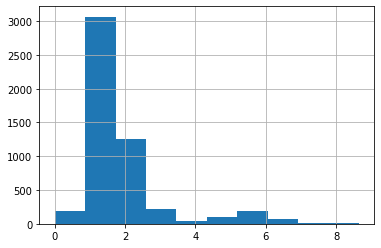

In [895]:
coeff_column.hist()

Aunque en proporción no ocurre en demasiadas ocasiones, es curiosa la elevación de casos a partir de un coeficiente de valor 4. Veamos algunos de ellos.

In [896]:
target_data_test[coeff_column >= 4]

,product,origen,YEAR,MONTH,price_mean,Volumen,Volumen (miles de kg),Precio medio kg
1340,CALABACIN,Extremadura,2018,8,0.300000,5000,544.75,1.43
1740,CEBOLLA,Navarra,2019,11,0.330000,8000,256.34,1.48
2539,LECHUGA,Andalucia,2018,1,0.450543,2564073,1939.78,2.90
2540,LECHUGA,Andalucia,2018,2,0.411126,3204047,1605.13,2.92
2541,LECHUGA,Andalucia,2018,3,0.366701,3897016,2015.24,2.94
...,...,...,...,...,...,...,...,...
4288,PUERRO,Pais Vasco,2020,3,0.700000,1075,396.15,3.07
4318,SANDIA,Andalucia,2018,12,0.350000,5474,2.14,2.08
4466,SANDIA,Valencia,2018,11,0.325000,12186,90.90,1.63
4467,SANDIA,Valencia,2018,12,0.325000,849,71.63,2.19


De primeras, parece que en algunos casos puede tener sentido: por ejemplo, la venta de sandías en Andalucía en diciembre en 2018. La sandía no es de temporada de diciembre, por lo que su cultivo en invernaderos puede que cause el incremento de su precio (más caché de cara al consumidor, aunque el de venta del agricultor sea más o menos fijo). No obstante, comprobemos qué productos tienen un precio de venta tan desproporcionado, y de dónde son esos productos.

In [897]:
target_data_test[coeff_column >= 4]['product'].unique()

array(['CALABACIN', 'CEBOLLA', 'LECHUGA', 'PEPINO', 'PUERRO', 'SANDIA',
       'TOMATE'], dtype=object)

In [898]:
target_data_test[coeff_column >= 4]['origen'].unique()

array(['Extremadura', 'Navarra', 'Andalucia', 'Aragon', 'Asturias',
       'Cantabria', 'Castilla La Mancha', 'Castilla Leon', 'Cataluña',
       'Galicia', 'La Rioja', 'Madrid', 'Murcia', 'Pais Vasco',
       'Valencia'], dtype=object)

Teniendo en cuenta que ocurre en múltiples comunidades y con varios productos diferentes, podría deberse al caso expuesto anterior mente, puesto que no hay un patrón claro.  
Comprobemos los productos en los que el precio del consumidor es 8 veces el de venta del agricultor.

In [899]:
target_data_test[coeff_column >= 8]

,product,origen,YEAR,MONTH,price_mean,Volumen,Volumen (miles de kg),Precio medio kg
2541,LECHUGA,Andalucia,2018,3,0.366701,3897016,2015.24,2.94
2601,LECHUGA,Cantabria,2018,3,0.363333,4500,97.25,3.03
2720,LECHUGA,Extremadura,2018,2,0.406667,2860,179.34,3.34
2797,LECHUGA,Madrid,2018,3,0.373625,42410,1235.28,3.23


Curiosamente, los precios que se ven más inflados son los de la lechuga.  
Otra opción a la que podría atribuirse este incremento de cara al consumidor se debe también a otras etiquetas de "calidad" del producto (ecológicos, orgánicos, denominación de origen, etc).

Realizado este inciso, se procederá a realizar la fusión entre *dat_merca* y *consumo_CCAA* por medio de un *outer join*.

AQUI ME HE QUEDAO COMENTANDO 

In [900]:
target_data = pd.merge(dat_merca_gb, consumo_CCAA, how='outer', on=['product', 'origen', 'YEAR', 'MONTH'])


In [901]:
target_data

,product,origen,YEAR,MONTH,price_mean,Volumen,Volumen (miles de kg),Precio medio kg
0,ACELGA,Andalucia,2018,1,0.750238,46516.0,NaN,NaN
1,ACELGA,Andalucia,2018,2,0.734375,37237.0,NaN,NaN
2,ACELGA,Andalucia,2018,3,0.672059,78318.0,NaN,NaN
3,ACELGA,Andalucia,2018,4,0.666176,64277.0,NaN,NaN
4,ACELGA,Andalucia,2018,5,0.869608,94592.0,NaN,NaN
...,...,...,...,...,...,...,...,...
13620,SANDIA,Galicia,2020,6,NaN,NaN,3109.46,1.11
13621,MELON,La Rioja,2020,6,NaN,NaN,220.73,2.00
13622,SANDIA,Madrid,2020,6,NaN,NaN,14111.09,1.00
13623,MELON,Navarra,2020,6,NaN,NaN,530.50,1.69


In [902]:
# Nulos del resultado :(
# Utilizar los valores del otro dataframe si en precio o volumen de alguno es nulo, pero para reducir la desviacion usaremos el coeff calculado
for index, row in target_data.iterrows():
  if np.isnan(row['price_mean']):
    target_data.at[index, 'price_mean'] =  row['Precio medio kg'] / coeff

  if np.isnan(row['Volumen']):
    target_data.at[index, 'Volumen'] =  row['Volumen (miles de kg)'] * 1000 # OJJOOOOOOOOOOOO 



In [903]:
target_data.drop(labels=['Volumen (miles de kg)', 'Precio medio kg'], axis=1, inplace=True)
target_data

,product,origen,YEAR,MONTH,price_mean,Volumen
0,ACELGA,Andalucia,2018,1,0.750238,46516.0
1,ACELGA,Andalucia,2018,2,0.734375,37237.0
2,ACELGA,Andalucia,2018,3,0.672059,78318.0
3,ACELGA,Andalucia,2018,4,0.666176,64277.0
4,ACELGA,Andalucia,2018,5,0.869608,94592.0
...,...,...,...,...,...,...
13620,SANDIA,Galicia,2020,6,0.733940,3109460.0
13621,MELON,La Rioja,2020,6,1.322415,220730.0
13622,SANDIA,Madrid,2020,6,0.661207,14111090.0
13623,MELON,Navarra,2020,6,1.117440,530500.0


In [904]:
target_data

,product,origen,YEAR,MONTH,price_mean,Volumen
0,ACELGA,Andalucia,2018,1,0.750238,46516.0
1,ACELGA,Andalucia,2018,2,0.734375,37237.0
2,ACELGA,Andalucia,2018,3,0.672059,78318.0
3,ACELGA,Andalucia,2018,4,0.666176,64277.0
4,ACELGA,Andalucia,2018,5,0.869608,94592.0
...,...,...,...,...,...,...
13620,SANDIA,Galicia,2020,6,0.733940,3109460.0
13621,MELON,La Rioja,2020,6,1.322415,220730.0
13622,SANDIA,Madrid,2020,6,0.661207,14111090.0
13623,MELON,Navarra,2020,6,1.117440,530500.0


In [905]:
# comprobando si hay nulos 
pd.isnull(target_data).any()

product       False
origen        False
YEAR          False
MONTH         False
price_mean    False
Volumen       False
dtype: bool

### 4.4 Transformación *aemet*

Para la transformación de *aemet*, primero se agrupará por comunidad autónoma, año y mes, puesto que había filas con esos tres elementos repetidos a causa de la normalización de 3.3, donde el nombre de la provincia se sustituyó por el nombre de su comunidad autónoma.

In [906]:
aemet_gb = aemet.groupby(['CCAA', 'Año', 'Mes', 'Dia'], as_index=False).mean()
aemet_gb

,CCAA,Año,Mes,Dia,Temperatura media (ºC),Precipitación 00-24h (mm)
0,Andalucia,2018,1,1,10.939450,0.015596
1,Andalucia,2018,1,2,10.911009,0.007339
2,Andalucia,2018,1,3,13.072477,0.007339
3,Andalucia,2018,1,4,12.550000,0.010185
4,Andalucia,2018,1,5,12.556604,3.045283
...,...,...,...,...,...,...
18542,Valencia,2020,12,27,6.997222,0.000000
18543,Valencia,2020,12,28,9.427778,1.022222
18544,Valencia,2020,12,29,8.241667,0.011111
18545,Valencia,2020,12,30,7.422857,0.000000


In [907]:
aemet_gb = aemet_gb.groupby(['CCAA', 'Año', 'Mes'], as_index=False).agg(temperatura=('Temperatura media (ºC)', 'mean'), precipitaciones=('Precipitación 00-24h (mm)', 'sum'))
aemet_gb

,CCAA,Año,Mes,temperatura,precipitaciones
0,Andalucia,2018,1,10.264179,47.599818
1,Andalucia,2018,2,9.682877,37.860739
2,Andalucia,2018,3,11.902725,247.331097
3,Andalucia,2018,4,14.838208,69.748901
4,Andalucia,2018,5,17.497122,26.713084
...,...,...,...,...,...
607,Valencia,2020,8,25.849649,10.494241
608,Valencia,2020,9,21.669074,15.342297
609,Valencia,2020,10,16.878997,8.408725
610,Valencia,2020,11,13.856558,114.333956


In [908]:
aemet_gb[aemet_gb['precipitaciones'] > 350]

,CCAA,Año,Mes,temperatura,precipitaciones
94,Asturias,2019,11,9.498024,360.416720
202,Cantabria,2019,11,9.283438,371.536289
562,Pais Vasco,2019,11,9.827647,383.279913


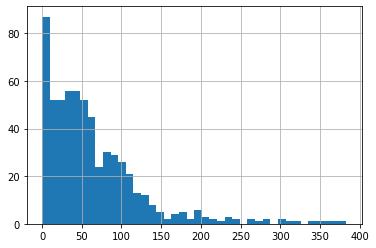

In [909]:
# HACER UN GRAFIQUITO PARA GRUPOS DE PRECIPITACIONES
aemet_gb['precipitaciones'].hist(bins=40)

In [910]:
# SE CORTAN 3 INTERVALOS
# 0-70, 70-155, 155-400 (poca humedo, medio, alto)
# VAMOS A JUSTIFICAR LOS INTERVALOS DE AHORA, COGEMOS K.MEANS :ddddddd

Tras esto, se va a discretizar el valor de las precipitaciones, para mayor comodidad y distinción de regiones más o menos lluviosas.  
Se probará con las estrategias *uniform*, *quantile* y *kmeans*.

In [911]:
# Precipitacion
#strategies: uniform, quantile, kmeans

results_precip  = []

for strategy in ['uniform', 'quantile', 'kmeans']:
  enc = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy=strategy)
  aemet_gb['Precipitacion_'+strategy] = enc.fit_transform(aemet_gb[['precipitaciones']])
  results_precip.append(aemet_gb.groupby(['Precipitacion_'+strategy])['precipitaciones'].mean())
 
results_precip


[Precipitacion_uniform
 0.0     47.214705
 1.0    172.324620
 2.0    313.812686
 Name: precipitaciones, dtype: float64, Precipitacion_quantile
 0.0     13.356289
 1.0     48.844347
 2.0    129.016897
 Name: precipitaciones, dtype: float64, Precipitacion_kmeans
 0.0     28.872557
 1.0     97.662174
 2.0    242.645231
 Name: precipitaciones, dtype: float64]

Ante estos resultados, se ha escogido la estrategia *k-means* para el resultado final, puesto que   
Así, se descartan las columnas de los otros dos.

In [912]:
# quedarnos solo con quantiles
aemet_gb.drop(labels=['Precipitacion_uniform', 'Precipitacion_quantile'], axis=1, inplace=True)

In [913]:
aemet_gb.drop(labels=['precipitaciones'], axis=1,  inplace=True)
aemet_gb.rename(columns={'Precipitacion_kmeans': 'Precipitacion_group'}, inplace=True)
aemet_gb.head()

,CCAA,Año,Mes,temperatura,Precipitacion_group
0,Andalucia,2018,1,10.264179,0.0
1,Andalucia,2018,2,9.682877,0.0
2,Andalucia,2018,3,11.902725,2.0
3,Andalucia,2018,4,14.838208,1.0
4,Andalucia,2018,5,17.497122,0.0


### 4.5 Fusión *aemet* + *target_data*

In [914]:
# Procedemos a fusionar target_data + aemet
aemet_gb.rename(columns={'Año':'YEAR', 'Mes':'MONTH', 'CCAA':'origen'}, inplace=True)
target_data = pd.merge(target_data, aemet_gb, how='left', on=['origen', 'YEAR', 'MONTH'])


In [915]:
target_data

,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group
0,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.264179,0.0
1,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.682877,0.0
2,ACELGA,Andalucia,2018,3,0.672059,78318.0,11.902725,2.0
3,ACELGA,Andalucia,2018,4,0.666176,64277.0,14.838208,1.0
4,ACELGA,Andalucia,2018,5,0.869608,94592.0,17.497122,0.0
...,...,...,...,...,...,...,...,...
13620,SANDIA,Galicia,2020,6,0.733940,3109460.0,16.840360,0.0
13621,MELON,La Rioja,2020,6,1.322415,220730.0,17.623452,1.0
13622,SANDIA,Madrid,2020,6,0.661207,14111090.0,19.970168,0.0
13623,MELON,Navarra,2020,6,1.117440,530500.0,17.770173,1.0


### 4.6 Fusión *calendario_siembra* + *riegos_temp_cultivos*

In [916]:
# Fusionar riegos_temp_cutivos + calendario
calendario_riegos_temp = pd.merge(calendario_siembra, riegos_temp_cultivos, how='left', on=['Cultivo'])
calendario_riegos_temp

,Cultivo,Inicio,Fin,Min siem-recol,Max siem-recol,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda
0,ACELGA,9,11,3,3,6.0,33.0,15.0,25.0,4,10
1,ACELGA,3,5,3,3,6.0,33.0,15.0,25.0,4,10
2,AJO,9,11,2,4,7.0,30.0,14.0,24.0,5,7
3,AJO,12,2,2,4,7.0,30.0,14.0,24.0,5,7
4,ALCACHOFA,3,5,3,4,7.0,29.0,15.0,18.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
59,SANDIA,3,5,4,4,15.0,35.0,21.0,35.0,5,50
60,TOMATE,3,5,4,4,15.0,25.0,15.0,25.0,2,3
61,ZANAHORIA,9,11,3,3,10.0,20.0,15.0,20.0,1,3
62,ZANAHORIA,3,5,3,3,10.0,20.0,15.0,20.0,1,3


### 4.7 Obtención de la tarjeta de datos

In [917]:
# Empezar a fusionar lo gordaco

target_data = pd.merge(target_data, calendario_riegos_temp, how='left', left_on=['product'], right_on=['Cultivo'])

In [918]:
target_data

,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group,Cultivo,Inicio,Fin,Min siem-recol,Max siem-recol,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda
0,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.264179,0.0,ACELGA,9,11,3,3,6.0,33.0,15.0,25.0,4,10
1,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.264179,0.0,ACELGA,3,5,3,3,6.0,33.0,15.0,25.0,4,10
2,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.682877,0.0,ACELGA,9,11,3,3,6.0,33.0,15.0,25.0,4,10
3,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.682877,0.0,ACELGA,3,5,3,3,6.0,33.0,15.0,25.0,4,10
4,ACELGA,Andalucia,2018,3,0.672059,78318.0,11.902725,2.0,ACELGA,9,11,3,3,6.0,33.0,15.0,25.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22830,SANDIA,Galicia,2020,6,0.733940,3109460.0,16.840360,0.0,SANDIA,3,5,4,4,15.0,35.0,21.0,35.0,5,50
22831,MELON,La Rioja,2020,6,1.322415,220730.0,17.623452,1.0,MELON,3,5,4,4,12.0,30.0,18.0,25.0,1,2
22832,SANDIA,Madrid,2020,6,0.661207,14111090.0,19.970168,0.0,SANDIA,3,5,4,4,15.0,35.0,21.0,35.0,5,50
22833,MELON,Navarra,2020,6,1.117440,530500.0,17.770173,1.0,MELON,3,5,4,4,12.0,30.0,18.0,25.0,1,2


In [919]:
for index, row in target_data.iterrows():
  target_data.at[index, 'distancia_mes_inicio_siem'] =  row['MONTH'] - row['Inicio'] 
  target_data.at[index, 'distancia_mes_fin_siem'] =  row['MONTH'] - row['Fin'] if row['Inicio'] < row['Fin'] else row['MONTH'] - row['Fin'] - 12



In [920]:
target_data.drop(labels=['Cultivo', 'Inicio', 'Fin' ], axis=1, inplace=True)

In [921]:
target_data

,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group,Min siem-recol,Max siem-recol,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda,distancia_mes_inicio_siem,distancia_mes_fin_siem
0,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.264179,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-8.0,-10.0
1,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.264179,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-2.0,-4.0
2,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.682877,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-7.0,-9.0
3,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.682877,0.0,3,3,6.0,33.0,15.0,25.0,4,10,-1.0,-3.0
4,ACELGA,Andalucia,2018,3,0.672059,78318.0,11.902725,2.0,3,3,6.0,33.0,15.0,25.0,4,10,-6.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22830,SANDIA,Galicia,2020,6,0.733940,3109460.0,16.840360,0.0,4,4,15.0,35.0,21.0,35.0,5,50,3.0,1.0
22831,MELON,La Rioja,2020,6,1.322415,220730.0,17.623452,1.0,4,4,12.0,30.0,18.0,25.0,1,2,3.0,1.0
22832,SANDIA,Madrid,2020,6,0.661207,14111090.0,19.970168,0.0,4,4,15.0,35.0,21.0,35.0,5,50,3.0,1.0
22833,MELON,Navarra,2020,6,1.117440,530500.0,17.770173,1.0,4,4,12.0,30.0,18.0,25.0,1,2,3.0,1.0


In [922]:
target_data.drop(labels=['Min siem-recol', 'Max siem-recol'], axis=1, inplace=True)

In [923]:
target_data.head()

,product,origen,YEAR,MONTH,price_mean,Volumen,temperatura,Precipitacion_group,Temperatura min req,Temperatura max req,Temperatura min opt,Temperatura max opt,Dias entre riego zona seca,Dias entre riego zona húmeda,distancia_mes_inicio_siem,distancia_mes_fin_siem
0,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.264179,0.0,6.0,33.0,15.0,25.0,4,10,-8.0,-10.0
1,ACELGA,Andalucia,2018,1,0.750238,46516.0,10.264179,0.0,6.0,33.0,15.0,25.0,4,10,-2.0,-4.0
2,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.682877,0.0,6.0,33.0,15.0,25.0,4,10,-7.0,-9.0
3,ACELGA,Andalucia,2018,2,0.734375,37237.0,9.682877,0.0,6.0,33.0,15.0,25.0,4,10,-1.0,-3.0
4,ACELGA,Andalucia,2018,3,0.672059,78318.0,11.902725,2.0,6.0,33.0,15.0,25.0,4,10,-6.0,-8.0


In [924]:
# Ver nulos y tal